# Investment Analysis Assignment

#### Objective

The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

#### Constraints:
1. It wants to invest between 5 to 15 million USD per round of investment
2. It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Checkpoint 1: Data Cleaning 1

### Import Dataset

In [2]:
# reading companies dataset
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
companies = pd.read_csv('companies.csv', encoding='palmos')

In [3]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
#checking general info of companies dataset

companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


We can observe that some values are missing

In [5]:
# reading rounds2 dataset

rounds2 = pd.read_csv('rounds2.csv', encoding='palmos')

In [6]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [7]:
# checking general info of rounds2 dataset

rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


We can observe that some values are missing

In [8]:
# Check unique entries in 'permalink' in companies dataset

companies.nunique()[0]

66368

In [9]:
# let's check shape of companies dataset

companies.shape

(66368, 10)

We can observe that Unique entries in 'permalink' column and total length of the dataset is same i.e. 66368

So we can consider 'permalink' as unique key in companies dataframe.

In [10]:
# convert values in 'permalink' to lowercase

companies['permalink'] = companies.permalink.str.lower()

In [11]:
companies['permalink'].head(10)

0                    /organization/-fame
1                 /organization/-qounter
2    /organization/-the-one-of-them-inc-
3                  /organization/0-6-com
4         /organization/004-technologies
5       /organization/01games-technology
6    /organization/0ndine-biomedical-inc
7                   /organization/0xdata
8                        /organization/1
9              /organization/1-2-3-listo
Name: permalink, dtype: object

In [12]:
# check the unique values in 'permalink' column in companies dataset again

companies.nunique()[0]

66368

This concludes that there are total 66368 unique companies present in companies dataset.

In [13]:
# check the unique values in 'company_permalink' column in rounds2 dataset

rounds2.nunique()[0]

90247

In [14]:
# convert values in 'company_permalink' to lowercase

rounds2['company_permalink'] = rounds2.company_permalink.str.lower()

In [15]:
rounds2['company_permalink'].head(10)

0                    /organization/-fame
1                 /organization/-qounter
2                 /organization/-qounter
3    /organization/-the-one-of-them-inc-
4                  /organization/0-6-com
5         /organization/004-technologies
6       /organization/01games-technology
7    /organization/0ndine-biomedical-inc
8    /organization/0ndine-biomedical-inc
9                   /organization/0xdata
Name: company_permalink, dtype: object

In [16]:
# check the unique values in 'company_permalink' column in rounds2 dataset again

rounds2.nunique()[0]

66368

We can see that after converting entries in lowercase, unique values changed from 90247 to 66368

Both the datasets have 66368 Unique companies present in them.

We can merge two both the datasets on `permalink`.

#### Creating master_frame

In [17]:
master_frame = pd.merge(companies, rounds2, left_on='permalink', right_on='company_permalink')

In [18]:
master_frame.head(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


In [19]:
# removing 'company_permalink' column

master_frame.drop(['company_permalink'], axis=1, inplace=True)

In [20]:
master_frame.head(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


In [21]:
# let's check the genreral info of master dataset

master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   name                     114948 non-null  object 
 2   homepage_url             108815 non-null  object 
 3   category_list            111539 non-null  object 
 4   status                   114949 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94428 non-null   object 
 10  funding_round_permalink  114949 non-null  object 
 11  funding_round_type       114949 non-null  object 
 12  funding_round_code       31140 non-null   object 
 13  funded_at                114949 non-null  object 
 14  rais

In [22]:
# also check shape of the master dataset

master_frame.shape

(114949, 15)

There are total 15 columns and 114949 entries in master_frame dataset.

In [23]:
#Let's check count of null values present in the dataset

master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [24]:
# Let's also check the % of null values present in our dataset

round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

We can see that `funding_round_code` has ~73% values missing. Also columns like `homepage_url`,`founded_at`,`state_code`,`region`,`city` are nit required for our anaylysis. So we can drop these columns. 

In [25]:
master_frame.drop(['funding_round_code','founded_at','homepage_url','state_code','city','region'], axis=1, inplace=True)

In [26]:
#Let's again check % of null values present in our dataset

round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

permalink                   0.00
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [27]:
# Let's explore `raised_amount_usd` column further
pd.set_option('float_format', '{:.2f}'.format)
master_frame.raised_amount_usd.describe()

count         94959.00
mean       10426869.33
std       114821247.98
min               0.00
25%          322500.00
50%         1680511.00
75%         7000000.00
max     21271935000.00
Name: raised_amount_usd, dtype: float64

In [28]:
# Also check null values present in 'raised_amlunt_usd' column

master_frame.raised_amount_usd[master_frame.raised_amount_usd.isnull()]

1        nan
5        nan
14       nan
17       nan
18       nan
          ..
114899   nan
114905   nan
114913   nan
114927   nan
114946   nan
Name: raised_amount_usd, Length: 19990, dtype: float64

In [29]:
# We can drop rows having null values from raised_amount _usd column

master_frame.dropna(subset=['raised_amount_usd'],inplace=True)

In [30]:
#Let's again check % of null values present in our dataset

round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

permalink                 0.00
name                      0.00
category_list             1.10
status                    0.00
country_code              6.16
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
dtype: float64

In [31]:
# Let's eplore null values in 'country_code' column

master_frame.country_code.value_counts()/len(master_frame.country_code)*100

USA   65.34
GBR    5.29
CAN    2.75
CHN    2.03
IND    1.74
FRA    1.53
ISR    1.44
ESP    1.13
DEU    1.10
AUS    0.68
RUS    0.62
IRL    0.59
SWE    0.59
SGP    0.57
NLD    0.56
JPN    0.51
ITA    0.51
BRA    0.51
CHE    0.46
CHL    0.45
KOR    0.45
FIN    0.40
DNK    0.33
ARG    0.31
BEL    0.31
HKG    0.26
TUR    0.21
NOR    0.20
BGR    0.20
MEX    0.20
AUT    0.16
POL    0.15
NZL    0.14
EST    0.13
PRT    0.11
ARE    0.10
MYS    0.10
COL    0.10
CZE    0.08
PER    0.08
ZAF    0.07
IDN    0.07
PHL    0.06
THA    0.06
UKR    0.06
TWN    0.06
LVA    0.06
HUN    0.06
NGA    0.05
GRC    0.05
LUX    0.05
KEN    0.04
LTU    0.04
ROM    0.04
EGY    0.04
CYP    0.03
SVK    0.03
ISL    0.03
VNM    0.03
JOR    0.03
PAK    0.03
SVN    0.03
LBN    0.03
URY    0.02
VEN    0.02
SRB    0.02
CYM    0.02
BGD    0.02
UGA    0.02
TAN    0.01
GHA    0.01
SAU    0.01
ECU    0.01
PAN    0.01
HRV    0.01
MUS    0.01
MLT    0.01
BMU    0.01
CRI    0.01
GTM    0.01
GIB    0.01
BLR    0.01
AZE    0.01
TTO 

USA has ~65% share in total dataset. Also as we can see, theres only 6.16% of rows which are null. Rather than imputing null values, we can get rid of them

In [32]:
master_frame.dropna(subset=['country_code'],inplace=True)

In [33]:
#Let's again check % of null values present in our dataset

round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

permalink                 0.00
name                      0.00
category_list             0.65
status                    0.00
country_code              0.00
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
dtype: float64

In [34]:
# Category_list column has 0.65% null values, we can get rid of these null values as well

master_frame.dropna(subset=['category_list'],inplace=True)
round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

permalink                 0.00
name                      0.00
category_list             0.00
status                    0.00
country_code              0.00
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
dtype: float64

Now our data seems cleaned, having no null values and having columns required for analysis. We can safely move ahead with this dataset for further analysis.

## Checkpoint 2: Funding Type Analysis

#### Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)

In [35]:
# Let's check all types of fundings present in master_frame

master_frame.funding_round_type.value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

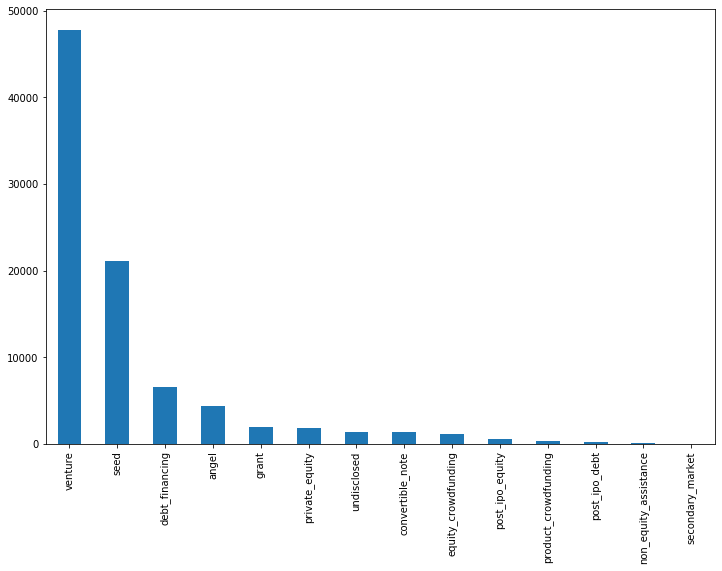

In [36]:
# Visualizing same data

plt.figure(figsize=(12,8))
master_frame['funding_round_type'].value_counts().plot.bar()

In [37]:
# Let's check average invested amount in each funding type

pd.set_option('float_format', '{:.2f}'.format)
master_frame.groupby('funding_round_type')['raised_amount_usd'].agg('mean')

funding_round_type
angel                      971573.89
convertible_note          1337186.65
debt_financing           17167653.47
equity_crowdfunding        509897.97
grant                     4512698.29
non_equity_assistance      480753.38
post_ipo_debt           169451789.77
post_ipo_equity          66077058.57
private_equity           73938486.28
product_crowdfunding      1353226.91
secondary_market         84438532.25
seed                       747793.68
undisclosed              15891661.39
venture                  11724222.69
Name: raised_amount_usd, dtype: float64

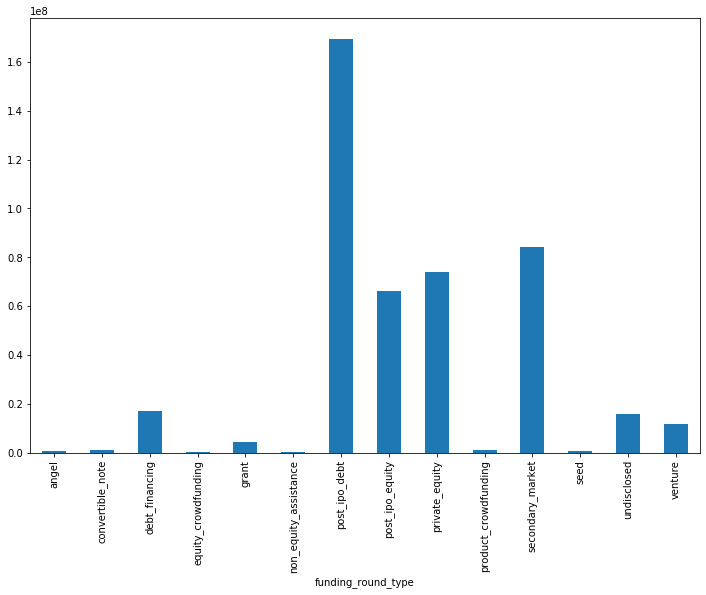

In [38]:
# Visualising same data

plt.figure(figsize=(12,8))
master_frame.groupby('funding_round_type')['raised_amount_usd'].agg('mean').plot.bar()

In [39]:
# Let's filter the data for four funding types which we want to consider (Venture, Angel, Seed, Private equity)

master_frame_filtered = master_frame[master_frame.funding_round_type.isin(['venture','angel','seed','private_equity'])]

In [40]:
master_frame_filtered.funding_round_type.value_counts()

venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64

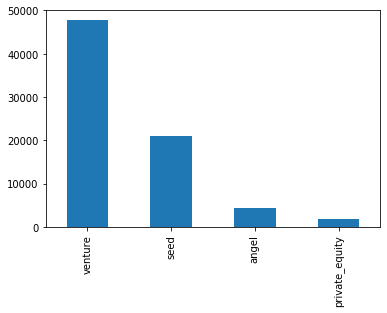

In [41]:
master_frame_filtered['funding_round_type'].value_counts().plot.bar()

We can see that most numbers of fundings are done in 'Venture' type.

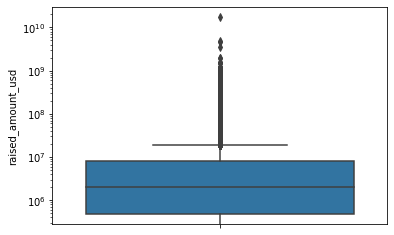

In [42]:
# Let's check distribution of these venture types based on raised_amount_usd

sns.boxplot(y=master_frame_filtered['raised_amount_usd'])
plt.yscale('log')

In [43]:
# Let's check summary of raised_amount_usd column
pd.set_option('float_format', '{:.2f}'.format)
master_frame_filtered['raised_amount_usd'].describe()

count         75124.00
mean        9519475.01
std        77927781.97
min               0.00
25%          470585.25
50%         2000000.00
75%         8000000.00
max     17600000000.00
Name: raised_amount_usd, dtype: float64

We can see that theres significant amount of difference between mean (9.3 Million Dollars) and Median (2 Million dollars)

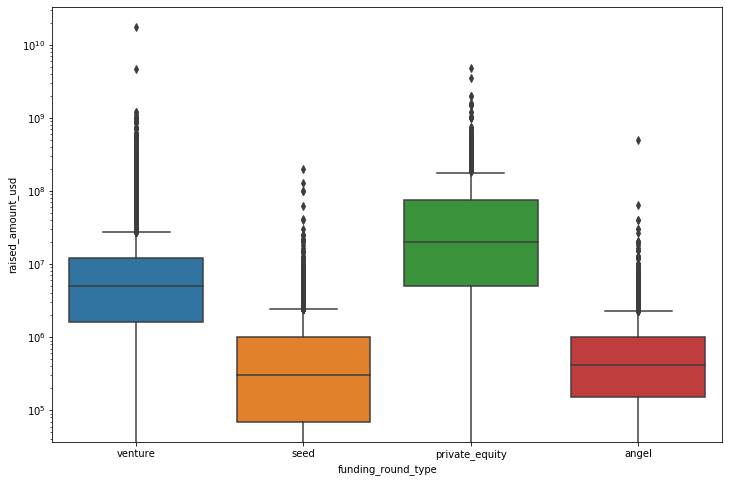

In [44]:
# Let's check distribution amongst funding types
plt.figure(figsize=(12,8))
sns.boxplot(y=master_frame_filtered['raised_amount_usd'], x=master_frame_filtered['funding_round_type'])
plt.yscale('log')

In [45]:
master_frame_filtered.pivot_table(values='raised_amount_usd',columns='funding_round_type',aggfunc=[np.mean,np.median]).stack()

mean      median
                  funding_round_type                        
raised_amount_usd angel                971573.89   414906.00
                  private_equity     73938486.28 20000000.00
                  seed                 747793.68   300000.00
                  venture            11724222.69  5000000.00

The difference between mean and median can still be seen across all the funding types.

Let's take median as a reference to find representative value as mean is influenced heavily by outliers.

By comparing medians, we can see that 'venture' type is falling in between limits of 5 million dollars to 15 million dollars, all other values are either below or above this limit.

So we can choose 'venture' as the representative value amongst 4 funding types.

##### Lets find average of all type of fundings

In [46]:
# Venture

venture_mean = round(master_frame_filtered[master_frame_filtered['funding_round_type']=='venture'].raised_amount_usd.mean())
print("Average funding for 'Venture' type is: {} USD".format(venture_mean))

Average funding for 'Venture' type is: 11724223 USD


In [47]:
# Seed

seed_mean = round(master_frame_filtered[master_frame_filtered['funding_round_type']=='seed'].raised_amount_usd.mean())
print("Average funding for 'Seed' type is: {} USD".format(seed_mean))

Average funding for 'Seed' type is: 747794 USD


In [48]:
# Angel

angel_mean = round(master_frame_filtered[master_frame_filtered['funding_round_type']=='angel'].raised_amount_usd.mean())
print("Average funding for 'Angel' type is: {} USD".format(angel_mean))

Average funding for 'Angel' type is: 971574 USD


In [49]:
# Private equity

private_equity_mean = round(master_frame_filtered[master_frame_filtered['funding_round_type']=='private_equity'].raised_amount_usd.mean())
print("Average funding for 'Private Equity' type is: {} USD".format(private_equity_mean))

Average funding for 'Private Equity' type is: 73938486 USD


##### Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, which investment type is the most suitable for it?

In [50]:
min_limit = 5000000
max_limit = 15000000
investment_mean = {'venture':venture_mean, 'angel':angel_mean, 'seed':seed_mean, 'private_equity':private_equity_mean}

for investment_type in investment_mean:
    if investment_mean[investment_type] > min_limit and investment_mean[investment_type] < max_limit:
        print('The preferred investment type is {}.'.format(investment_type))

The preferred investment type is venture.


## Checkpoint 3: Country Analysis

### Identify the top three English-speaking countries in the data frame top9.

In [51]:
# Let's first identify top 9 contries present in master_frame

master_frame_filtered.country_code.value_counts()[0:9]

USA    51585
GBR     4049
CAN     2193
CHN     1810
IND     1556
FRA     1386
ISR     1226
DEU      944
ESP      882
Name: country_code, dtype: int64

In [52]:
# Let's check if these are the same countries in terms of venture type funding

master_frame_filtered[master_frame_filtered['funding_round_type']=='venture'].country_code.value_counts()[0:9]

USA    35943
GBR     2041
CHN     1548
CAN     1246
FRA      912
IND      819
ISR      786
DEU      554
ESP      316
Name: country_code, dtype: int64

In [53]:
# Let's check countries based on total amount raised in usd for venture type funding 

master_frame_filtered[master_frame_filtered['funding_round_type']=='venture'].groupby('country_code').sum().sort_values('raised_amount_usd', ascending=False)[0:9]

,raised_amount_usd
country_code,
USA,420068029342.00
CHN,39338918773.00
GBR,20072813004.00
IND,14261508718.00
CAN,9482217668.00
FRA,7226851352.00
ISR,6854350477.00
DEU,6306921981.00
JPN,3167647127.00


In [54]:
# let's save this as top9 dataframe

top9 = master_frame_filtered[master_frame_filtered['funding_round_type']=='venture'].groupby('country_code').sum().sort_values('raised_amount_usd', ascending=False)[0:9]

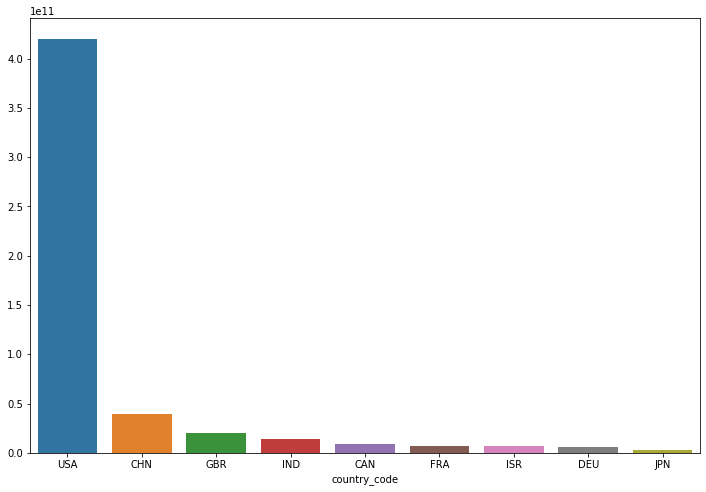

In [55]:
plt.figure(figsize=(12,8))
sns.barplot(x=top9.index,y=top9.values.reshape(-1))

###### USA, China, United Kingdom, India, Canada, France, Israel, Germany and Japan are top 9 english speaking countries where maximum funding has been done in 'venture' type.

###### USA, United Kingdom and India are top 3 English-speaking countries

## Checkpoint 4: Sector Analysis 1

#### We will map primany sector of each company to the eight main sectors

In [56]:
# Let's read mapping.csv file first

mapping = pd.read_csv('mapping.csv')

In [57]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [58]:
# Drop first row as it has NaN value

mapping.drop([0], inplace=True)

As we can see, all the sectors are one hot encoded to its main sector.

In [59]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 1 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      687 non-null    int64 
 2   Blanks                                   687 non-null    int64 
 3   Cleantech / Semiconductors               687 non-null    int64 
 4   Entertainment                            687 non-null    int64 
 5   Health                                   687 non-null    int64 
 6   Manufacturing                            687 non-null    int64 
 7   News, Search and Messaging               687 non-null    int64 
 8   Others                                   687 non-null    int64 
 9   Social, Finance, Analytics, Advertising  687 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 59.0+ KB


In [60]:
# Let's check our master_frame dataset again

master_frame_filtered.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.00
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.00
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.00
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.00


In [61]:
master_frame_filtered.isnull().sum()

permalink                  0
name                       1
category_list              0
status                     0
country_code               0
funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
dtype: int64

We can see that few rows have multiple sectors in category_list column. As per our discussion with CEO, The first category in the category list column can be considered as primary category

In [62]:
# Let's extract primary sector from category_list in a new column

master_frame_filtered['primary_sector'] = master_frame_filtered['category_list'].str.split('|').str[0]

In [63]:
master_frame_filtered.head(20)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,Media
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.00,Application Platforms
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.00,Curated Web
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.00,Biotechnology
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.00,Biotechnology
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,22-05-2013,3000000.00,Analytics
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,Analytics
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,Analytics
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,Analytics
13,/organization/1,One Inc.,Mobile,operating,USA,/funding-round/03b975068632eba5bfdb937ec8c07a68,seed,05-02-2014,150000.00,Mobile


In [64]:
# We need to merge the both datasets

# First let's check if all the sectors present primary_sector column of master_frame_filtered are also present in mapping dataset

mapping.category_list[(~mapping['category_list'].isin(master_frame_filtered['primary_sector']))]

20              Alter0tive Medicine
22                         A0lytics
59                Big Data A0lytics
79                Business A0lytics
89                          Can0bis
91                 Career Ma0gement
103                   Chi0 Internet
114                 Cloud Ma0gement
145               Contact Ma0gement
198        Digital Rights Ma0gement
199                  Digital Sig0ge
210              Document Ma0gement
223                Educatio0l Games
240                Energy Ma0gement
241                  Energy Storage
256                 Event Ma0gement
271               Film Distribution
273                          Fi0nce
274               Fi0nce Technology
275              Fi0ncial Exchanges
276               Fi0ncial Services
281                 Fleet Ma0gement
282                         Flowers
283                            Fmcg
310                       Gover0nce
353              Identity Ma0gement
370            Innovation Ma0gement
372    Intellectual Asset Ma

We can see that at many places '0' is present. After observing we understand that 'na' has been replaced by '0'

In [65]:
# Let's replace '0' back to 'na'

mapping.category_list = mapping.category_list.str.lower()

In [66]:
mapping['category_list'] = mapping['category_list'].apply(lambda x:x.replace('0','na'))

In [67]:
# Let's check again if it's in correct format now

mapping.category_list[20]

'alternative medicine'

In [68]:
# Let's check again if there any missing sectors in the mapping dataset

mapping.category_list[~(mapping['category_list'].isin(master_frame_filtered['primary_sector']))]

1                    3d
2           3d printing
3         3d technology
4            accounting
5      active lifestyle
             ...       
683           wholesale
684    wine and spirits
685            wireless
686               women
687        young adults
Name: category_list, Length: 687, dtype: object

In [69]:
master_frame_filtered.primary_sector[~(master_frame_filtered['primary_sector'].isin(mapping['category_list']))]

0                         Media
2         Application Platforms
4                   Curated Web
7                 Biotechnology
8                 Biotechnology
                  ...          
114941      Enterprise Software
114942              Advertising
114943              Advertising
114945              Advertising
114947     Consumer Electronics
Name: primary_sector, Length: 75124, dtype: object

In [70]:
master_frame_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75124 entries, 0 to 114947
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                75124 non-null  object 
 1   name                     75123 non-null  object 
 2   category_list            75124 non-null  object 
 3   status                   75124 non-null  object 
 4   country_code             75124 non-null  object 
 5   funding_round_permalink  75124 non-null  object 
 6   funding_round_type       75124 non-null  object 
 7   funded_at                75124 non-null  object 
 8   raised_amount_usd        75124 non-null  float64
 9   primary_sector           75124 non-null  object 
dtypes: float64(1), object(9)
memory usage: 8.8+ MB


In [71]:
# Let's merge both the datasets on 'primary_sector'

master_frame_filtered.primary_sector = master_frame_filtered.primary_sector.str.lower()

In [72]:
merged_frame_filtered = pd.merge(master_frame_filtered, mapping, left_on='primary_sector', right_on='category_list', how='inner')

In [73]:
merged_frame_filtered.head(10)

,permalink,name,category_list_x,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,category_list_y,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,media,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.00,media,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.00,media,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.00,media,media,0,0,0,1,0,0,0,0,0
4,/organization/akira-mobile,Akira Mobile,Media|Mobile|SMS|Telecommunications,operating,LTU,/funding-round/bfb170aea580e381e5b1810c87855c9e,seed,01-08-2012,18410.00,media,media,0,0,0,1,0,0,0,0,0
5,/organization/all-day-media,ALL DAY MEDIA,Media|Social Media,operating,USA,/funding-round/2760c0426a124b84c540bd4fd2dfe6e5,seed,16-12-2014,2000000.00,media,media,0,0,0,1,0,0,0,0,0
6,/organization/all-def-digital,All Def Digital,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.00,media,media,0,0,0,1,0,0,0,0,0
7,/organization/anthill-magazine,Anthill Magazine,Media,operating,AUS,/funding-round/52128cd405b88f36a85d6cded8359f1c,seed,09-04-2015,600000.00,media,media,0,0,0,1,0,0,0,0,0
8,/organization/audiosocket,Audiosocket,Media|Music|Technology,operating,USA,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,02-05-2013,650000.00,media,media,0,0,0,1,0,0,0,0,0
9,/organization/audiosocket,Audiosocket,Media|Music|Technology,operating,USA,/funding-round/4e3a53eec6c609943df752206070b23f,venture,02-09-2009,750000.00,media,media,0,0,0,1,0,0,0,0,0


In [74]:
# Let's frop category_list_y as it has same values as primary_sector

merged_frame_filtered.drop(['category_list_y'], axis=1, inplace=True)

In [75]:
merged_frame_filtered.head(10)

,permalink,name,category_list_x,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.00,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.00,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.00,media,0,0,0,1,0,0,0,0,0
4,/organization/akira-mobile,Akira Mobile,Media|Mobile|SMS|Telecommunications,operating,LTU,/funding-round/bfb170aea580e381e5b1810c87855c9e,seed,01-08-2012,18410.00,media,0,0,0,1,0,0,0,0,0
5,/organization/all-day-media,ALL DAY MEDIA,Media|Social Media,operating,USA,/funding-round/2760c0426a124b84c540bd4fd2dfe6e5,seed,16-12-2014,2000000.00,media,0,0,0,1,0,0,0,0,0
6,/organization/all-def-digital,All Def Digital,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.00,media,0,0,0,1,0,0,0,0,0
7,/organization/anthill-magazine,Anthill Magazine,Media,operating,AUS,/funding-round/52128cd405b88f36a85d6cded8359f1c,seed,09-04-2015,600000.00,media,0,0,0,1,0,0,0,0,0
8,/organization/audiosocket,Audiosocket,Media|Music|Technology,operating,USA,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,02-05-2013,650000.00,media,0,0,0,1,0,0,0,0,0
9,/organization/audiosocket,Audiosocket,Media|Music|Technology,operating,USA,/funding-round/4e3a53eec6c609943df752206070b23f,venture,02-09-2009,750000.00,media,0,0,0,1,0,0,0,0,0


In [76]:
# Let's filter this dataframe further for veture type funding and top 3 countries we are intersted in

merged_frame_filtered = merged_frame_filtered[(merged_frame_filtered.funding_round_type=='venture')]
merged_frame_filtered.head()

,permalink,name,category_list_x,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.00,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.00,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.00,media,0,0,0,1,0,0,0,0,0
6,/organization/all-def-digital,All Def Digital,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.00,media,0,0,0,1,0,0,0,0,0


In [77]:
merged_frame_filtered = merged_frame_filtered[(merged_frame_filtered.country_code=='USA')|(merged_frame_filtered.country_code=='IND')|(merged_frame_filtered.country_code=='GBR')]

merged_frame_filtered.head()

,permalink,name,category_list_x,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.00,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.00,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.00,media,0,0,0,1,0,0,0,0,0
6,/organization/all-def-digital,All Def Digital,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.00,media,0,0,0,1,0,0,0,0,0


In [78]:
merged_frame_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 0 to 75068
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   permalink                                38788 non-null  object 
 1   name                                     38788 non-null  object 
 2   category_list_x                          38788 non-null  object 
 3   status                                   38788 non-null  object 
 4   country_code                             38788 non-null  object 
 5   funding_round_permalink                  38788 non-null  object 
 6   funding_round_type                       38788 non-null  object 
 7   funded_at                                38788 non-null  object 
 8   raised_amount_usd                        38788 non-null  float64
 9   primary_sector                           38788 non-null  object 
 10  Automotive & Sports                      38788

Our Merged Dataset has the column of primary sector and all the 8 main sectors. Primary sector is marked under one of the 8 sectors as 1. This creates lots of unnecessary columns in our dataset. We can combine all the main sectors in one column along with their values in next column. This can be done with the function pd.melt() in pandas. 


From Pandas.melt Documentation - 
This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’.

In [79]:
# Let's identify measured variables (value_vars) from our dataset

value_vars = merged_frame_filtered.columns[9:]

print(value_vars)

Index(['primary_sector', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')


In [80]:
# Also identify identifier variables (id_vars) from our dataset

id_vars = merged_frame_filtered.columns[0:9]

print(id_vars)

Index(['permalink', 'name', 'category_list_x', 'status', 'country_code',
       'funding_round_permalink', 'funding_round_type', 'funded_at',
       'raised_amount_usd'],
      dtype='object')


In [81]:
# Let's create melted dataframe with the help of pd.melt()

melted_master_frame = pd.melt(merged_frame_filtered,
                              id_vars=list(id_vars),
                              value_vars=list(value_vars),
                              var_name='main_sector',
                              value_name='value')

In [82]:
melted_master_frame.head(10)

,permalink,name,category_list_x,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector,value
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,primary_sector,media
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.00,primary_sector,media
2,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.00,primary_sector,media
3,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.00,primary_sector,media
4,/organization/all-def-digital,All Def Digital,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.00,primary_sector,media
5,/organization/audiosocket,Audiosocket,Media|Music|Technology,operating,USA,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,02-05-2013,650000.00,primary_sector,media
6,/organization/audiosocket,Audiosocket,Media|Music|Technology,operating,USA,/funding-round/4e3a53eec6c609943df752206070b23f,venture,02-09-2009,750000.00,primary_sector,media
7,/organization/audiosocket,Audiosocket,Media|Music|Technology,operating,USA,/funding-round/bc0b412cf2fa7b739e4105ad756b47a4,venture,15-02-2012,1582300.00,primary_sector,media
8,/organization/babble,Babble,Media|News|Parenting,acquired,USA,/funding-round/43cc678b39be3e684bb88501af05ff9b,venture,05-02-2009,2000000.00,primary_sector,media
9,/organization/babble,Babble,Media|News|Parenting,acquired,USA,/funding-round/5fdb3dbeeb6eea0243702adc372130f3,venture,12-05-2009,1250000.00,primary_sector,media


It looks like we have lot's of rows with 0 value, let's get rid of those rows

In [83]:
melted_master_frame = melted_master_frame[melted_master_frame.value==1]

In [84]:
melted_master_frame.head()

,permalink,name,category_list_x,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector,value
63790,/organization/allasso-industries,Allasso Industries,Design,operating,USA,/funding-round/1af4cb5a75d03188d2d3c4f221106710,venture,17-11-2009,443000.00,Automotive & Sports,1
63791,/organization/angaza-design,Angaza,Design|Energy|Social Entrepreneurship,operating,USA,/funding-round/187e39f2c4ac54bd476425f2d94cc4b4,venture,23-10-2015,4000000.00,Automotive & Sports,1
63792,/organization/archpro-design-automation,ArchPro Design Automation,Design|EDA Tools|Manufacturing,operating,USA,/funding-round/ad6e2f94da8594ceb31a6499ae85ba2b,venture,23-05-2006,4500000.00,Automotive & Sports,1
63793,/organization/bloo-solar,Bloo Solar,Design|Electronics|Energy|Solar,operating,USA,/funding-round/281338ea198970928b7f7fba60bcfd05,venture,29-12-2014,10000000.00,Automotive & Sports,1
63794,/organization/california-arts-council,California Arts Council,Design,operating,USA,/funding-round/5079cf2e228dd3bf11df01862c0682a5,venture,17-07-2013,2000000.00,Automotive & Sports,1


In [85]:
# Let's drop value column as its not of any use for analysis

melted_master_frame.drop(['value'], axis=1, inplace=True)

In [86]:
melted_master_frame.head()

,permalink,name,category_list_x,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector
63790,/organization/allasso-industries,Allasso Industries,Design,operating,USA,/funding-round/1af4cb5a75d03188d2d3c4f221106710,venture,17-11-2009,443000.00,Automotive & Sports
63791,/organization/angaza-design,Angaza,Design|Energy|Social Entrepreneurship,operating,USA,/funding-round/187e39f2c4ac54bd476425f2d94cc4b4,venture,23-10-2015,4000000.00,Automotive & Sports
63792,/organization/archpro-design-automation,ArchPro Design Automation,Design|EDA Tools|Manufacturing,operating,USA,/funding-round/ad6e2f94da8594ceb31a6499ae85ba2b,venture,23-05-2006,4500000.00,Automotive & Sports
63793,/organization/bloo-solar,Bloo Solar,Design|Electronics|Energy|Solar,operating,USA,/funding-round/281338ea198970928b7f7fba60bcfd05,venture,29-12-2014,10000000.00,Automotive & Sports
63794,/organization/california-arts-council,California Arts Council,Design,operating,USA,/funding-round/5079cf2e228dd3bf11df01862c0682a5,venture,17-07-2013,2000000.00,Automotive & Sports


In [87]:
melted_master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 63790 to 387876
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                38788 non-null  object 
 1   name                     38788 non-null  object 
 2   category_list_x          38788 non-null  object 
 3   status                   38788 non-null  object 
 4   country_code             38788 non-null  object 
 5   funding_round_permalink  38788 non-null  object 
 6   funding_round_type       38788 non-null  object 
 7   funded_at                38788 non-null  object 
 8   raised_amount_usd        38788 non-null  float64
 9   main_sector              38788 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.3+ MB


## Checkpoint 5: Sector Analysis 2

#### Till now we have observed that,

- Preferred Funding Type - Venture
- Top 3 English Speaking Countries - United States of America, United Kingdom, India
- Minimum Limit - USD 5,000,000
- Maximum Limit - USD 15,000,000

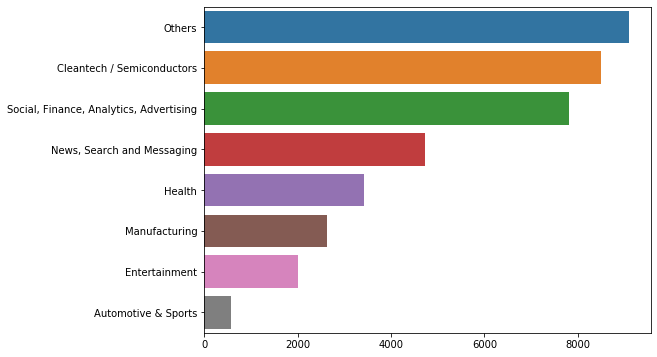

Others                                     9110
Cleantech / Semiconductors                 8492
Social, Finance, Analytics, Advertising    7814
News, Search and Messaging                 4727
Health                                     3429
Manufacturing                              2630
Entertainment                              2006
Automotive & Sports                         580
Name: main_sector, dtype: int64


In [88]:
sector_count = melted_master_frame['main_sector'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sector_count.values, y=sector_count.index)
plt.show()

print(sector_count)

In [89]:
# Let's create 3 dataframes for 3 countries

#USA
D1 = melted_master_frame[(melted_master_frame.raised_amount_usd >= 5000000) & (melted_master_frame.raised_amount_usd <= 15000000) & (melted_master_frame.country_code == 'USA')]

#GBR
D2 = melted_master_frame[(melted_master_frame.raised_amount_usd >= 5000000) & (melted_master_frame.raised_amount_usd <= 15000000) & (melted_master_frame.country_code == 'GBR')]

#IND
D3 = melted_master_frame[(melted_master_frame.raised_amount_usd >= 5000000) & (melted_master_frame.raised_amount_usd <= 15000000) & (melted_master_frame.country_code == 'IND')]

In [90]:
# Let's check if we have all the columns as main_dataframe along with primary and main sector. Also our filter for finding limit is proper

print(D1.columns)
print('\n')
print(D1.describe())
print('-'*30)
print(D2.columns)
print('\n')
print(D2.describe())
print('-'*30)
print(D3.columns)
print('\n')
print(D3.describe())

Index(['permalink', 'name', 'category_list_x', 'status', 'country_code',
       'funding_round_permalink', 'funding_round_type', 'funded_at',
       'raised_amount_usd', 'main_sector'],
      dtype='object')


       raised_amount_usd
count           12063.00
mean          8932860.59
std           3075861.23
min           5000000.00
25%           6000970.50
50%           8300000.00
75%          11000000.00
max          15000000.00
------------------------------
Index(['permalink', 'name', 'category_list_x', 'status', 'country_code',
       'funding_round_permalink', 'funding_round_type', 'funded_at',
       'raised_amount_usd', 'main_sector'],
      dtype='object')


       raised_amount_usd
count             621.00
mean          8661962.47
std           2867166.77
min           5000000.00
25%           6084330.00
50%           8000000.00
75%          10606760.00
max          15000000.00
------------------------------
Index(['permalink', 'name', 'category_list_x', 'status', 'country_co

In [91]:
# Let's get count for total number on investment and sum of total amout invested per main_sector and add it in existing dataframe

def get_count_and_sum(df):
    df['total_no_of_investment'] = df['main_sector'].map(df['main_sector'].value_counts().to_dict())
    df['total_amount_invested'] = df['main_sector'].map(df[['main_sector', 'raised_amount_usd']].groupby(df['main_sector']).sum()['raised_amount_usd'].to_dict())

for df in [D1,D2,D3]:
    get_count_and_sum(df)

In [92]:
# USA Dataframe

D1.head()

,permalink,name,category_list_x,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector,total_no_of_investment,total_amount_invested
63793,/organization/bloo-solar,Bloo Solar,Design|Electronics|Energy|Solar,operating,USA,/funding-round/281338ea198970928b7f7fba60bcfd05,venture,29-12-2014,10000000.00,Automotive & Sports,167,1454104361.00
63795,/organization/california-linear-devices,California Linear Devices,Design,acquired,USA,/funding-round/2f1ad49bebd0a69798d071ab0f7cfb99,venture,28-08-2001,10500000.00,Automotive & Sports,167,1454104361.00
63804,/organization/digg,Digg,Design|News|Social Bookmarking|Social Media|Te...,acquired,USA,/funding-round/eba8d445f97992a81d5571d68aaf919b,venture,12-07-2011,5000000.00,Automotive & Sports,167,1454104361.00
63805,/organization/digg,Digg,Design|News|Social Bookmarking|Social Media|Te...,acquired,USA,/funding-round/fac3a91a8145d98c8dc2302afc7de82a,venture,01-12-2006,8500000.00,Automotive & Sports,167,1454104361.00
63807,/organization/digital-domain-media-group,Digital Domain Media Group,Design,closed,USA,/funding-round/7a2fe3903442f2cb77d336395122bf73,venture,22-06-2012,10500000.00,Automotive & Sports,167,1454104361.00


In [93]:
# GBR Dataframe

D2.head()

,permalink,name,category_list_x,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector,total_no_of_investment,total_amount_invested
63855,/organization/made-com,made.com,Design|E-Commerce|Furniture|Home & Garden,operating,GBR,/funding-round/350da83566d70fe8bc21e4c07f758b63,venture,10-01-2012,9278918.00,Automotive & Sports,16,167051565.00
70363,/organization/autoquake,Autoquake,Automotive|Cars|E-Commerce|Insurance|Internet|...,acquired,GBR,/funding-round/067d143de46ec298cfa1893682f9911a,venture,11-05-2008,11890000.00,Automotive & Sports,16,167051565.00
70364,/organization/autoquake,Autoquake,Automotive|Cars|E-Commerce|Insurance|Internet|...,acquired,GBR,/funding-round/4c8372dfdea687c5f5fbab39b3e44dab,venture,01-07-2006,6000000.00,Automotive & Sports,16,167051565.00
70365,/organization/autoquake,Autoquake,Automotive|Cars|E-Commerce|Insurance|Internet|...,acquired,GBR,/funding-round/721aefa6f7e5bc71eb9d744359941958,venture,01-04-2009,5755376.00,Automotive & Sports,16,167051565.00
70366,/organization/autoquake,Autoquake,Automotive|Cars|E-Commerce|Insurance|Internet|...,acquired,GBR,/funding-round/a4d5080cbda34c2ef4295d8fbe4e9ad5,venture,01-04-2008,11911764.00,Automotive & Sports,16,167051565.00


In [94]:
# IND Dataframe

D3.head()

,permalink,name,category_list_x,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector,total_no_of_investment,total_amount_invested
63895,/organization/tonbo-imaging,Tonbo Imaging,Design,operating,IND,/funding-round/a8423b53ae8e4995bd52a48eaf5014e0,venture,05-08-2013,6400000.00,Automotive & Sports,13,136900000.00
70342,/organization/ani-technologies,Ola,Automotive|E-Commerce|Internet|Mobile|Mobile C...,operating,IND,/funding-round/1e2b54335e2a41d8d7db25b7c11db399,venture,10-04-2012,5000000.00,Automotive & Sports,13,136900000.00
70354,/organization/ather-energy,Ather Energy,Automotive|Electric Vehicles,operating,IND,/funding-round/a3782f52b69e60629bcf7866ca8b1eca,venture,29-05-2015,12000000.00,Automotive & Sports,13,136900000.00
70384,/organization/cardekho,Cardekho,Automotive|Cars|Online Shopping,operating,IND,/funding-round/3875ae874b0511ede2f7d8597e0d126f,venture,27-11-2013,15000000.00,Automotive & Sports,13,136900000.00
70443,/organization/incredible-technologies-pvt-ltd,Incredible Technologies (CredR),Automotive,operating,IND,/funding-round/6a4ce4ed8be26c7a2d0a24f4a92fd958,venture,11-09-2015,15000000.00,Automotive & Sports,13,136900000.00


In [95]:
# Let's check count of total no of investement and sum of total investement per main_sector

print(D1.groupby(['main_sector']).raised_amount_usd.agg(['count','sum']))
print('-'*25)
print(D2.groupby(['main_sector']).raised_amount_usd.agg(['count','sum']))
print('-'*25)
print(D3.groupby(['main_sector']).raised_amount_usd.agg(['count','sum']))

                                         count            sum
main_sector                                                  
Automotive & Sports                        167  1454104361.00
Cleantech / Semiconductors                2350 21633430822.00
Entertainment                              591  5099197982.00
Health                                     909  8211859357.00
Manufacturing                              799  7258553378.00
News, Search and Messaging                1583 13971567428.00
Others                                    2950 26321007002.00
Social, Finance, Analytics, Advertising   2714 23807376964.00
-------------------------
                                         count           sum
main_sector                                                 
Automotive & Sports                         16  167051565.00
Cleantech / Semiconductors                 130 1163990056.00
Entertainment                               56  482784687.00
Health                                      24  2

In [96]:
# Total no of investements for USA

print(D1['main_sector'].count())

12063


In [97]:
# Total no of investements for GBR

print(D2['main_sector'].count())

621


In [98]:
# Total no of Investments for IND

print(D3['main_sector'].count())

328


In [99]:
# Total amount invested in USD for USA

print(D1['raised_amount_usd'].sum())

107757097294.0


In [100]:
# Total amount invested in USD for GBR

print(D2['raised_amount_usd'].sum())

5379078691.0


In [101]:
# Total amount invested in USD for IND

print(D3['raised_amount_usd'].sum())

2949543602.0


In [102]:
# Let's check top 3 sectors from USA who got the highest number of fundings

print(D1['main_sector'].value_counts().sort_values(ascending=False).head(3))

Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
Name: main_sector, dtype: int64


In [103]:
# Let's check top 3 sectors from GBR who got the highest number of fundings

print(D2['main_sector'].value_counts().sort_values(ascending=False).head(3))

Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
Name: main_sector, dtype: int64


In [104]:
# Let's check top 3 sectors from IND who got the highest number of fundings

print(D3['main_sector'].value_counts().sort_values(ascending=False).head(3))

Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Name: main_sector, dtype: int64


##### Name of company which received highest funding for best sector

In [105]:
# USA

D1[D1['main_sector']=='Others'].groupby('name').sum().sort_values('raised_amount_usd', ascending=False).head(1).reset_index()['name']

0    Virtustream
Name: name, dtype: object

In [106]:
# GBR

D2[D2['main_sector']=='Others'].groupby('name').sum().sort_values('raised_amount_usd', ascending=False).head(1).reset_index()['name']

0    Electric Cloud
Name: name, dtype: object

In [107]:
# IND

D3[D3['main_sector']=='Others'].groupby('name').sum().sort_values('raised_amount_usd', ascending=False).head(1).reset_index()['name']

0    FirstCry.com
Name: name, dtype: object

##### Name of company which received highest funding for second-best sector

In [108]:
# USA

D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('name').sum().sort_values('raised_amount_usd', ascending=False).head(1).reset_index()['name']

0    SST Inc. (Formerly ShotSpotter)
Name: name, dtype: object

In [109]:
# GBR

D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('name').sum().sort_values('raised_amount_usd', ascending=False).head(1).reset_index()['name']

0    Celltick Technologies
Name: name, dtype: object

In [110]:
# IND

D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('name').sum().sort_values('raised_amount_usd', ascending=False).head(1).reset_index()['name']

0    Manthan Systems
Name: name, dtype: object

## Checkpoint 6: Plots


### 1. Fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type.

In [111]:
funding_type_count = master_frame_filtered['funding_round_type'].value_counts()
funding_type_count

venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64

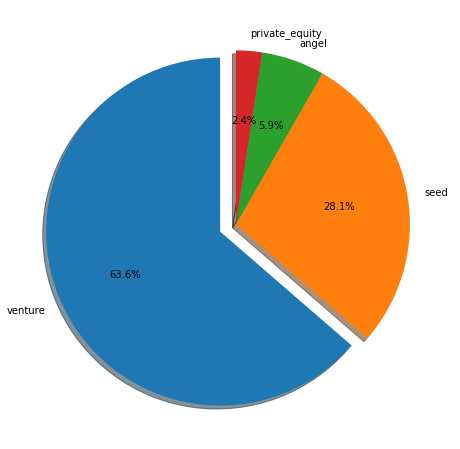

In [112]:
plt.figure(figsize=(12,8))
plt.pie(funding_type_count.values,
        labels=funding_type_count.index,
        shadow=True,
        explode=(0.1,0,0,0),
        autopct='%1.1f%%',
        startangle=90)
plt.show()

##### We can see that most number of  investements are done in 'venture' type

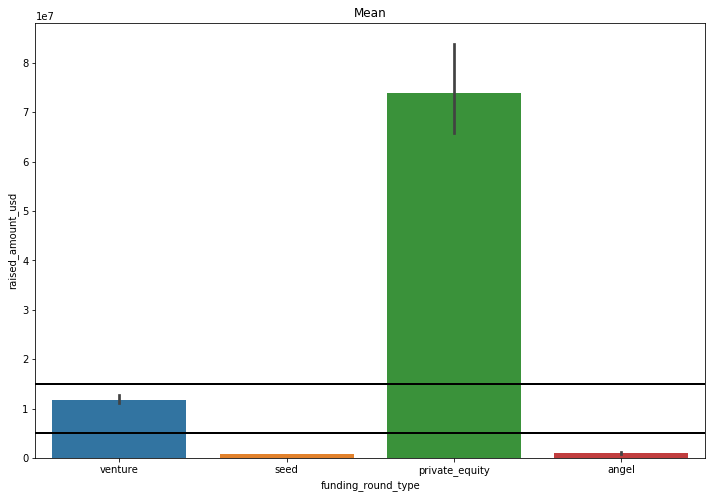

                          mean
funding_round_type            
angel                971573.89
private_equity     73938486.28
seed                 747793.68
venture            11724222.69


In [113]:
# let's also check thier distribution, we'll check both mean and median.

plt.figure(figsize=(12,8))

sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame_filtered)
plt.title('Mean')
plt.axhline(y=5000000, linewidth=2, color = 'k')
plt.axhline(y=15000000, linewidth=2, color = 'k')

plt.show()

print(master_frame_filtered.groupby('funding_round_type')['raised_amount_usd'].agg(['mean']))

##### We can see from above chart that 'venture' type funding falls in between our set limit of 5 Million USD to 15 Miliion USD.

##### Based on above two observations, we can choose 'venture' as our preferred funding type.

### 2. Top 9 countries against the total amount of investments of funding type 'venture'

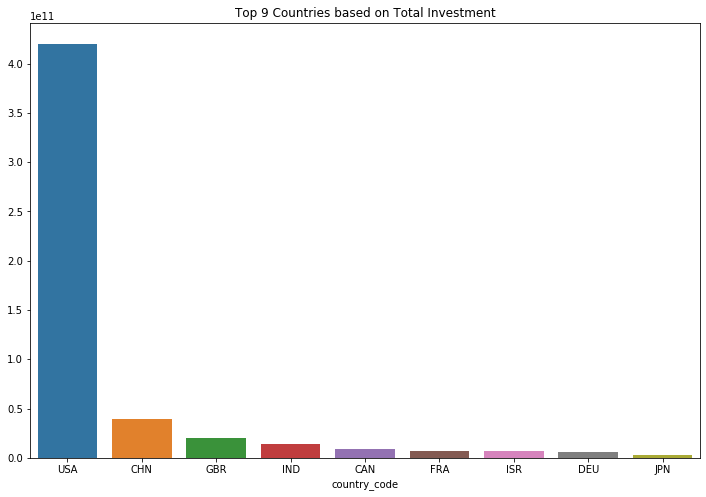

                        mean
country_code                
CAN            9482217668.00
CHN           39338918773.00
DEU            6306921981.00
FRA            7226851352.00
GBR           20072813004.00
IND           14261508718.00
ISR            6854350477.00
JPN            3167647127.00
USA          420068029342.00


In [114]:
plt.figure(figsize=(12,8))
sns.barplot(x=top9.index, y=top9.values.reshape(-1))
plt.title('Top 9 Countries based on Total Investment')

plt.show()

print(top9.groupby('country_code')['raised_amount_usd'].agg(['mean']))

###  3. Number of investments in the top 3 sectors of the top 3 countries

#### USA

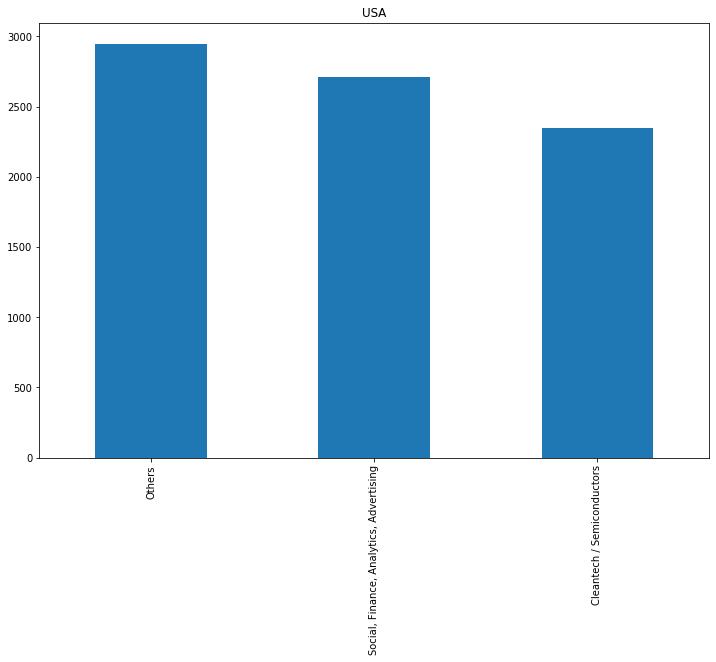

In [115]:
top_3_sec_usa = D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]

plt.figure(figsize=(12,8))
top_3_sec_usa['main_sector'].value_counts().plot.bar()
plt.title('USA')

plt.show()

#### GBR

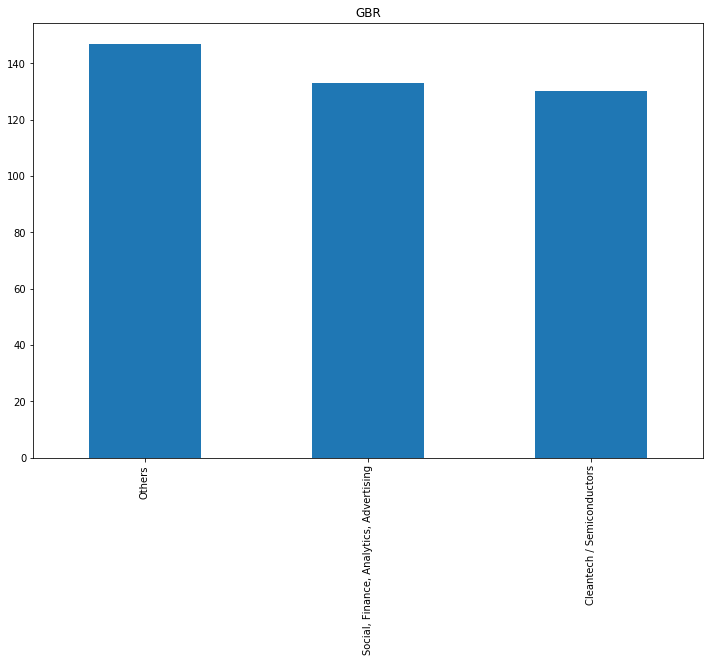

In [116]:
top_3_sec_gbr = D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]

plt.figure(figsize=(12,8))
top_3_sec_gbr['main_sector'].value_counts().plot.bar()
plt.title('GBR')

plt.show()

### IND

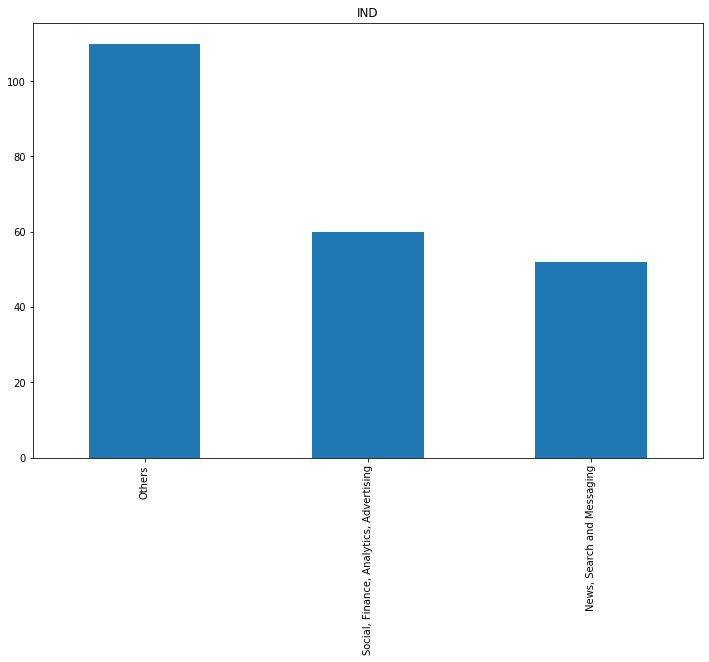

In [117]:
top_3_sec_ind = D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])]

plt.figure(figsize=(12,8))
top_3_sec_ind['main_sector'].value_counts().plot.bar()
plt.title('IND')

plt.show()

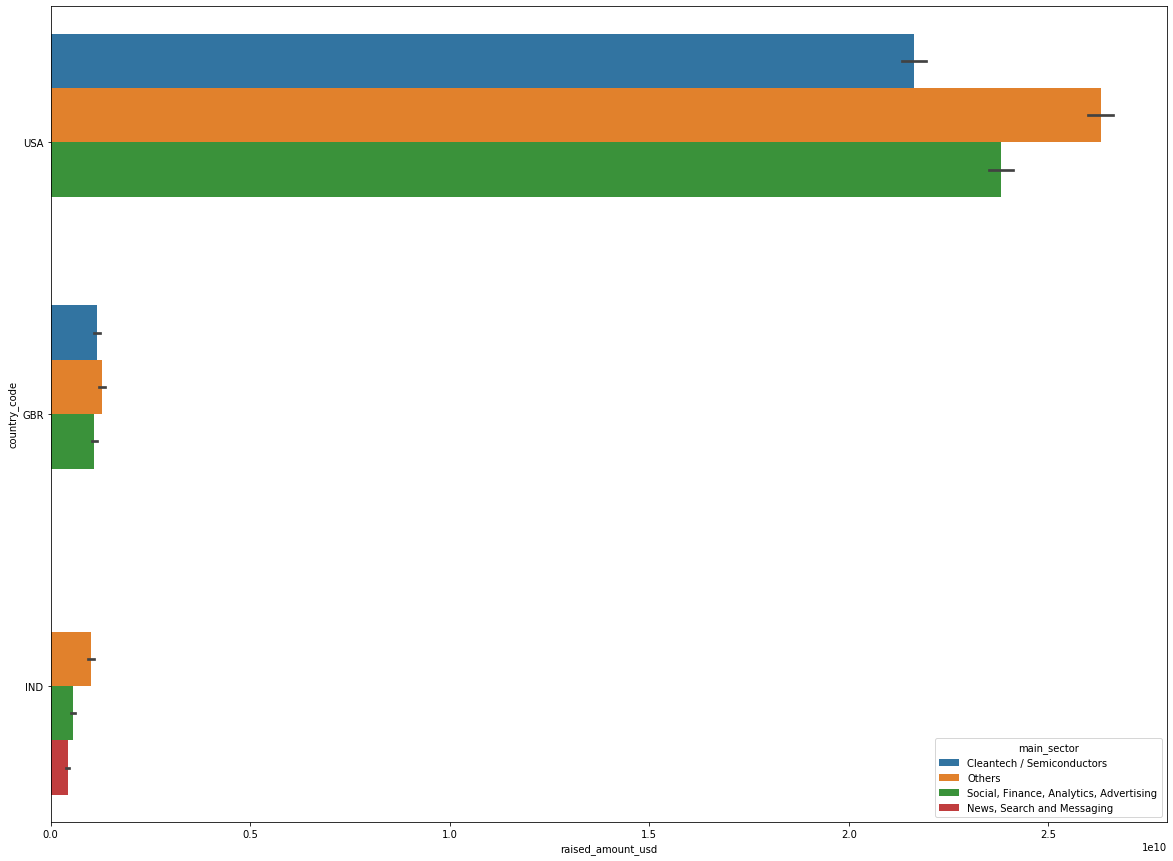

In [118]:
countries_df = [top_3_sec_usa, top_3_sec_gbr, top_3_sec_ind]

merged_country_df = pd.concat(countries_df)

plt.figure(figsize=(20, 15))
sns.barplot(y='country_code', x='raised_amount_usd', hue="main_sector", data=merged_country_df, estimator=np.sum)
plt.show()

# Conclusion

1. Preferred Funding Type - Venture
***

2. Top 3 English speaking countries preferred for investing - United States (USA), United Kingdom (GBR) & India (IND) respectively
***

3. Top 3 sectors preferred for funding in USA
    - Others
    - Social, Finance, Analytics, Advertising
    - Cleantech / Semiconductors
***
   
4. Top 3 sectors preferred for funding in United Kingdom
    - Others
    - Social, Finance, Analytics, Advertising
    - Cleantech / Semiconductors
***

5. Top 3 sectors preferred for funding in India
    - Others
    - Social, Finance, Analytics, Advertising
    - News, Search and Messaging
  